# Groningen parkeer boetes

### Hoofdoelstelling: het aantal niet-betalers minimaliseren  
Door:   zoveel mogelijk boetes uitschrijven...

Proces:
1. scan van de auto
2. beoordeling op kantoor
3. beoordeling (en boete) op lokatie       

Dataset scans: https://we.tl/t-LwszxhmMvH
Parkeerplaatsen in groningen: https://groningen.dataplatform.nl/#/data/f0d63b83-61cb-45e6-967b-b7dfda7adf5d?totalViews=24

Analyse:  
- Tijd analyse:
    - Op welke dagen zijn er de meeste boetes? Het percentage boetes (tov het aantal meting) is zondag en zaterdag hoger dan de doordeweekse dagen
    - Worden er op dagelijks evenveel metingen gedaan? Nee, met name op zondag worden aanzienlijk minder meting gedaan.
    - Wordt er op zondag op specifieke plekken gecontroleerd ivm doordeweekse dagen?
- Wijk analyse: (wijk > buurt)
    - welke wijk heeft het hoogste % boetes
    - welke wijk heeft het hoogste absolute aantal boetes
    - welke wijk heeft de meeste parkeerplaatsen?
    - welke wijken worden het meest gecontroleerd?
- Buurt analyse: 
    - welke buurt heeft het hoogste % boetes
    - welke buurt heeft het hoogste absolute aantal boetes
    - welke buurt heeft de meeste parkeerplaatsen
    - welke buurten worden het meest gecontroleerd?

In [1]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from pathlib import Path
import statistics as stats
%matplotlib inline

In [2]:
# variabelen
url_parkeervakken = "https://ckan.dataplatform.nl/dataset/7ff17203-0dba-40f8-9abf-1b770baa6be6/resource/ed307596-cadd-4982-821c-29856260ae2e/download/parkeervakken_gem_groningen.json"
scanfile = Path('source/Scans.csv')

In [3]:
# lees data van url parkeervakken en zet in dataframe
with urllib.request.urlopen(url_parkeervakken) as file:
    df_pv = json.loads(file.read().decode())
df_parkingspots = pd.DataFrame([feature['properties'] for feature in df_pv['features']])

# lees scan data
df_scan = pd.read_csv(scanfile, sep=';', decimal=",")

# Scan file EDA

In [4]:
stats.BasicStats(df_scan)

,column,type,min,max,range,mean,stdev,populated,sum,unique,uniquelist,nulls,not applicable
0,ScanIdentifier,int64,1307388.000000,3255016.000000,1947628.000000,2280697.359689,562210.266599,1945623,4437377239050.000000,1945623,,0,
1,ScanDatumTijd,string,,,,,,1945623,,1411511,too many,0,0
2,Maand,int64,4.000000,10.000000,6.000000,7.096538,2.012292,1945623,13807188.000000,7,,0,
3,Kwartaal,int64,2.000000,4.000000,2.000000,2.747120,0.712251,1945623,5344860.000000,3,,0,
4,Jaar,int64,2019.000000,2019.000000,0.000000,2019.000000,0.000000,1945623,3928212837.000000,1,,0,
5,Feestdag,int64,0.000000,1.000000,1.000000,0.003090,0.055502,1945623,6012.000000,2,,0,
6,Werkdag,int64,0.000000,1.000000,1.000000,0.814603,0.388620,1945623,1584910.000000,2,,0,
7,WeekdagNaam,string,,,,,,1945623,,7,"{Zaterdag, Donderdag, Zondag, Maandag, Woensda...",0,0
8,Tijdstip24,string,,,,,,1945623,,922,too many,0,0
9,ScanType,string,,,,,,1945623,,3,"{Mulder, Unknown, Fiscaal}",0,0


In [5]:
df_scan.head(5)

,ScanIdentifier,ScanDatumTijd,Maand,Kwartaal,Jaar,Feestdag,Werkdag,WeekdagNaam,Tijdstip24,ScanType,...,Buurt,WijkCode,Wijk,AutoVoorFiscaal,ScanSubjectLatitude,ScanSubjectLongitude,ScanAfstand,ScanBetrouwbaarheid,Boete,VoertuigType
0,1307461,2019-04-01 09:19:32.0000000,4,2,2019,0,1,Maandag,9:19,Unknown,...,Binnenstad-Zuid,1400,Centrum,Nee,53.214588,6.573483,2.0350,937,0,NaN
1,1307489,2019-04-01 09:20:02.0000000,4,2,2019,0,1,Maandag,9:20,Fiscaal,...,Binnenstad-Zuid,1400,Centrum,Nee,53.214725,6.573359,-2.0000,1000,0,NaN
2,1307491,2019-04-01 09:20:04.0000000,4,2,2019,0,1,Maandag,9:20,Fiscaal,...,Binnenstad-Zuid,1400,Centrum,Ja,53.214622,6.573147,4.8875,676,0,NaN
3,1307557,2019-04-01 09:26:24.0000000,4,2,2019,0,1,Maandag,9:26,Unknown,...,Binnenstad-Zuid,1400,Centrum,Nee,53.212921,6.563151,1.9500,923,0,NaN
4,1307507,2019-04-01 09:22:18.0000000,4,2,2019,0,1,Maandag,9:22,Fiscaal,...,Binnenstad-Zuid,1400,Centrum,Nee,53.214279,6.572367,-0.0500,1000,0,NaN


# Scan file data handling
1. zet kolom ScanDatumTijd naar date format
2. maak een datum kolom aan (zonder tijd)  
3. zet kolom Tijd24 naar tijd format

In [6]:
# 1
df_scan['ScanDatumTijd'] = pd.to_datetime(df_scan['ScanDatumTijd'])
# 2
df_scan['Datum'] = df_scan['ScanDatumTijd'].dt.date
df_scan['Datum'] = pd.to_datetime(df_scan['Datum'])
# 3
df_scan['Tijdstip24'] = pd.to_datetime(df_scan['Tijdstip24'],format= '%H:%M' ).dt.time

In [7]:
def grouping(df, grouper, group):
    """
    Functie voor het maken van geaggregeerde waarden
    Voegt tevens een relatieve kolom toe
    """
    df_out = df[[grouper, group]].groupby(grouper).count().reset_index().merge(df[[grouper, group]].groupby(grouper).sum().reset_index(), on=grouper)
    df_out.columns=[grouper, 'count', 'sum']
    df_out['relative'] = (df_out['sum'] / df_out['count'])
    
    return df_out

### datum analyse

Er is gemeten van 2019-04-01 t/m 2019-10-31.  
Totaal 202 dagen

In [8]:
df_datums = grouping(df_scan, 'Datum', 'Boete')
df_datums.describe()

,count,sum,relative
count,202.000000,202.000000,202.000000
mean,9631.797030,147.841584,0.017017
std,3289.131607,60.138519,0.008200
min,1089.000000,0.000000,0.000000
25%,8427.250000,117.500000,0.012797
50%,10352.000000,145.500000,0.015077
75%,11959.000000,182.000000,0.019239
max,14626.000000,309.000000,0.047960


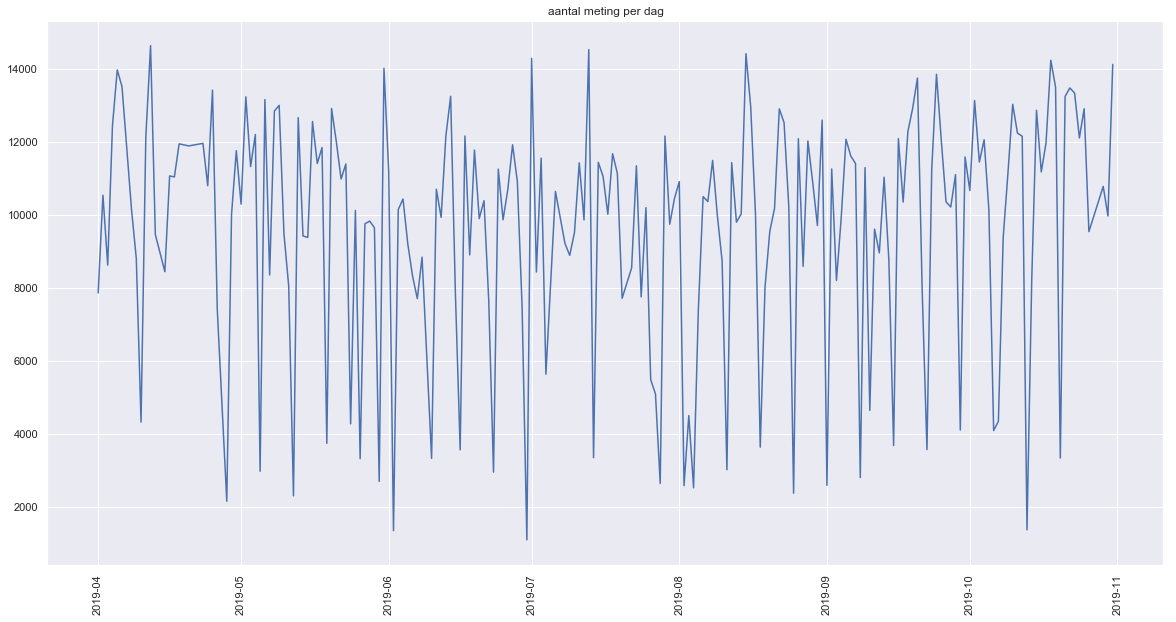

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df_datums['Datum'], df_datums['count'])
plt.title('aantal meting per dag')
plt.xticks(rotation='vertical')
plt.show()

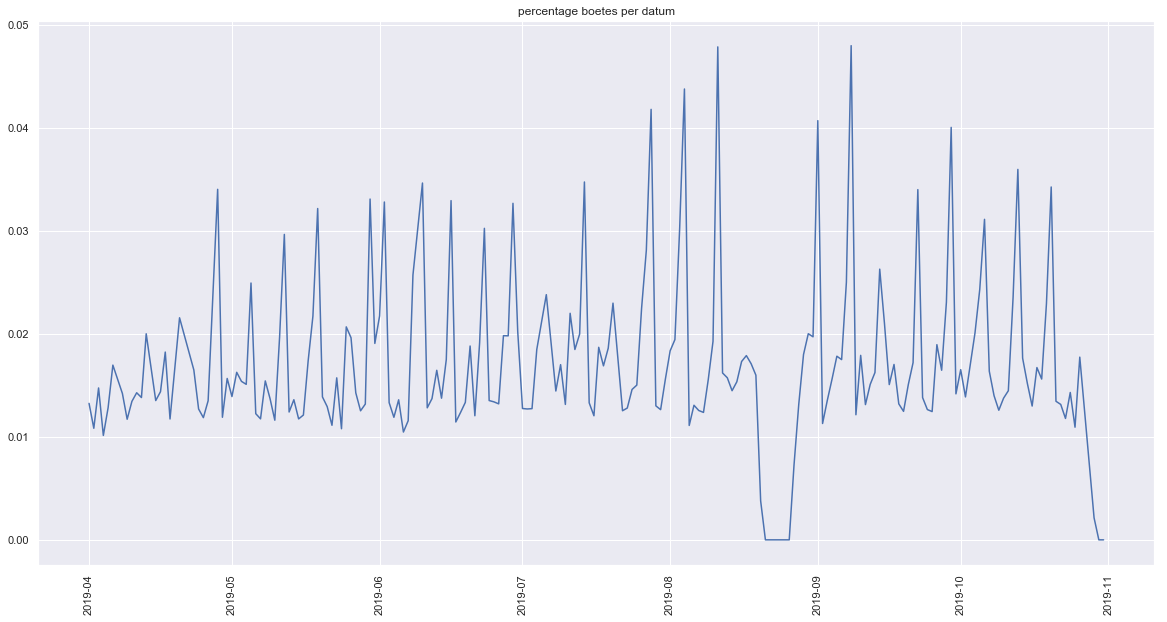

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df_datums['Datum'], df_datums['relative'])
plt.title('percentage boetes per datum')
plt.xticks(rotation='vertical')
plt.show()

In augustus en (eind) oktober zijn een aantal metingen met waarde 0. Dit is onwaarschijnlijk. De records van die dagen worden verwijderd.

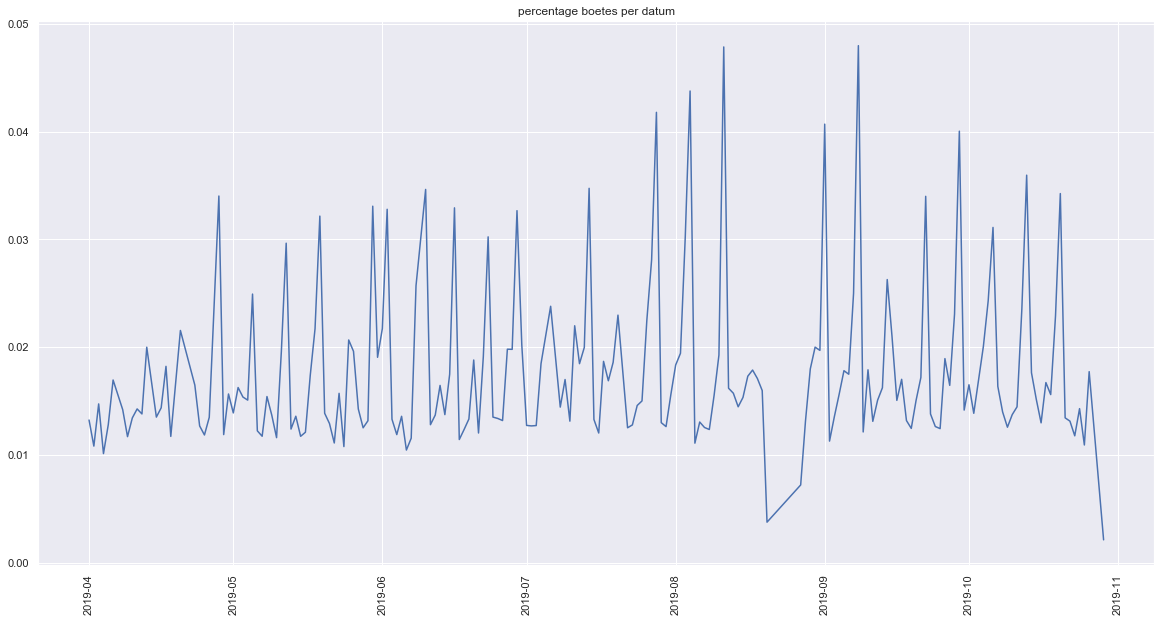

In [11]:
# verwijder datums met 0 boetes
df_scan = df_scan[-df_scan['Datum'].isin(df_datums[df_datums['sum'] == 0]['Datum'])]
df_datums = grouping(df_scan, 'Datum', 'Boete')

plt.figure(figsize=(20,10))
plt.plot(df_datums['Datum'], df_datums['relative'])
plt.title('percentage boetes per datum')
plt.xticks(rotation='vertical')
plt.show()

Onderzoeken: zijn de pieken weekenden?

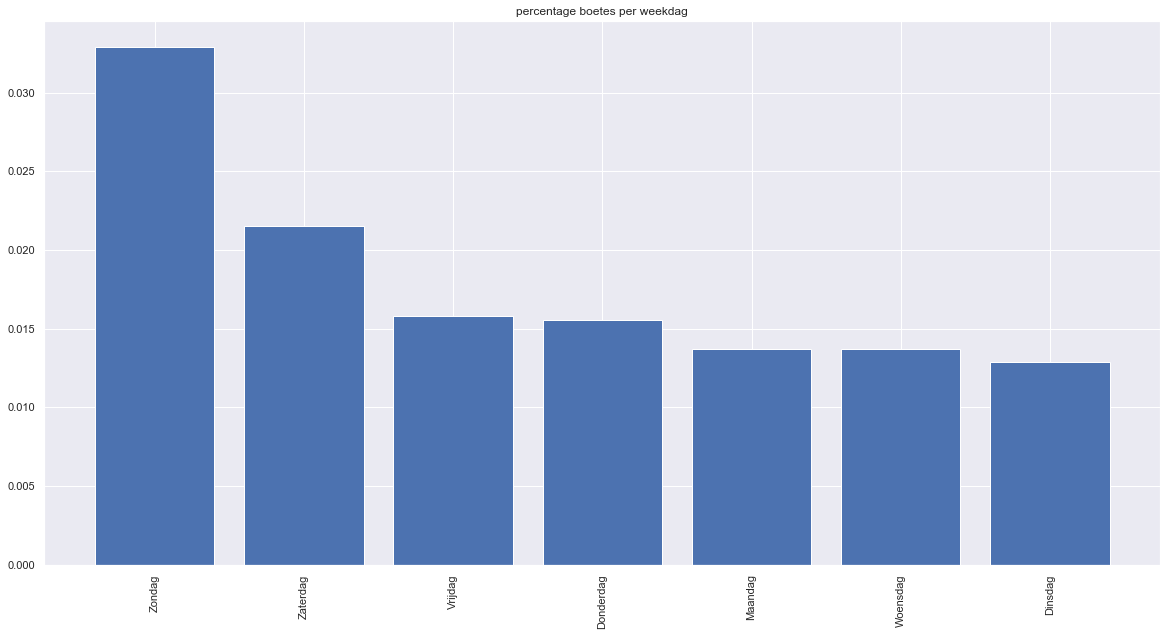

In [12]:
df_weekdagnaam = grouping(df_scan, 'WeekdagNaam', 'Boete').sort_values(by='relative', ascending=False)

plt.figure(figsize=(20,10))
plt.bar(df_weekdagnaam['WeekdagNaam'], df_weekdagnaam['relative'])
plt.title('percentage boetes per weekdag')
plt.xticks(rotation='vertical')
plt.show()

Met name op zondag en zaterdag worden relatief veel boetes gegeven. 

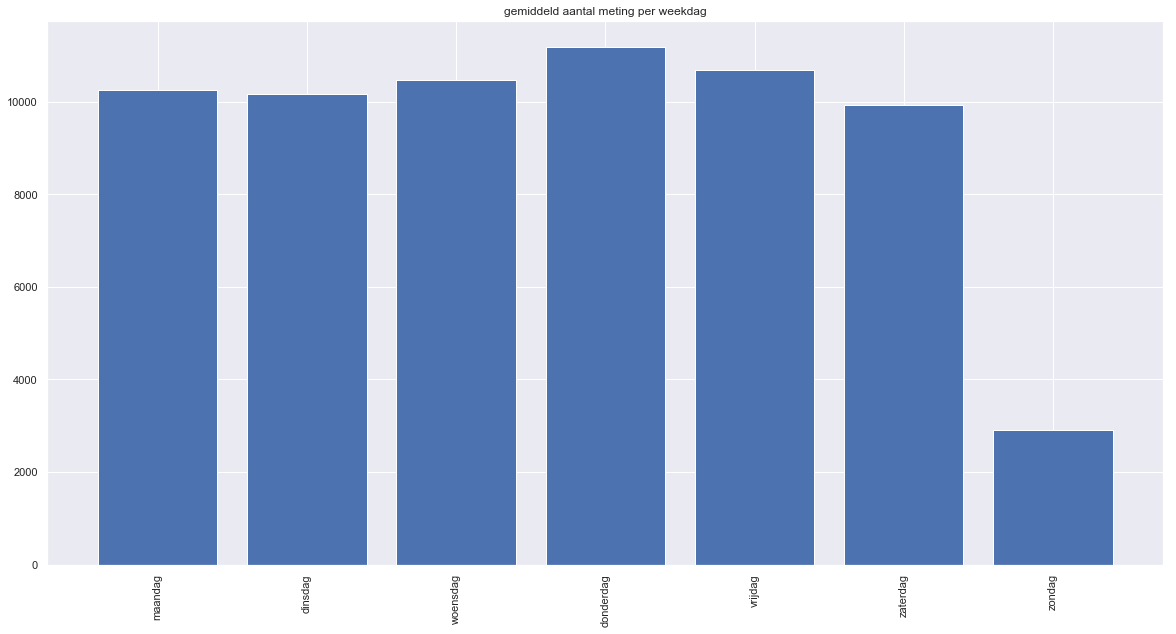

In [13]:
df = df_scan[['Datum', 'Boete']].groupby(['Datum']).count()
t = df.groupby(df.index.dayofweek)['Boete'].mean()
dagen = ['maandag', 'dinsdag', 'woensdag', 'donderdag', 'vrijdag', 'zaterdag', 'zondag']

plt.figure(figsize=(20,10))
plt.bar(dagen, t)
plt.title('gemiddeld aantal meting per weekdag')
plt.xticks(rotation='vertical')
plt.show()

Op zondag worden gemiddeld minder metingen gedaan. 

### Wijk analyse

In [14]:
# gemiddelde wijk coordinaten. Niet geheel zuiver maar genoeg voor op een kaart...
df_wijk_coords = df_scan[['Wijk', 'ScanSubjectLatitude','ScanSubjectLongitude']].groupby('Wijk').mean().reset_index()
df_wijk_coords

,Wijk,ScanSubjectLatitude,ScanSubjectLongitude
0,Centrum,53.219536,6.565495
1,Helpman e.o.,53.200794,6.582702
2,Hoogkerk e.o.,53.209238,6.548071
3,Nieuw-West,53.213257,6.541990
4,Noordwest,53.229093,6.552178
5,Oosterparkwijk,53.223811,6.580416
6,Oud-Noord,53.230029,6.568182
7,Oud-West,53.220607,6.551113
8,Oud-Zuid,53.209897,6.568289
9,Zuidoost,53.210410,6.582985


In [15]:
df_wijk = grouping(df_scan, 'Wijk', 'Boete').sort_values(by=['relative'], ascending=False)
df_wijk

,Wijk,count,sum,relative
9,Zuidoost,16624,436,0.026227
0,Centrum,467466,11445,0.024483
6,Oud-Noord,247987,3919,0.015803
1,Helpman e.o.,25427,401,0.015771
5,Oosterparkwijk,179367,2372,0.013224
8,Oud-Zuid,489650,6195,0.012652
7,Oud-West,360239,4292,0.011914
4,Noordwest,74561,804,0.010783
2,Hoogkerk e.o.,2,0,0.000000
3,Nieuw-West,7,0,0.000000


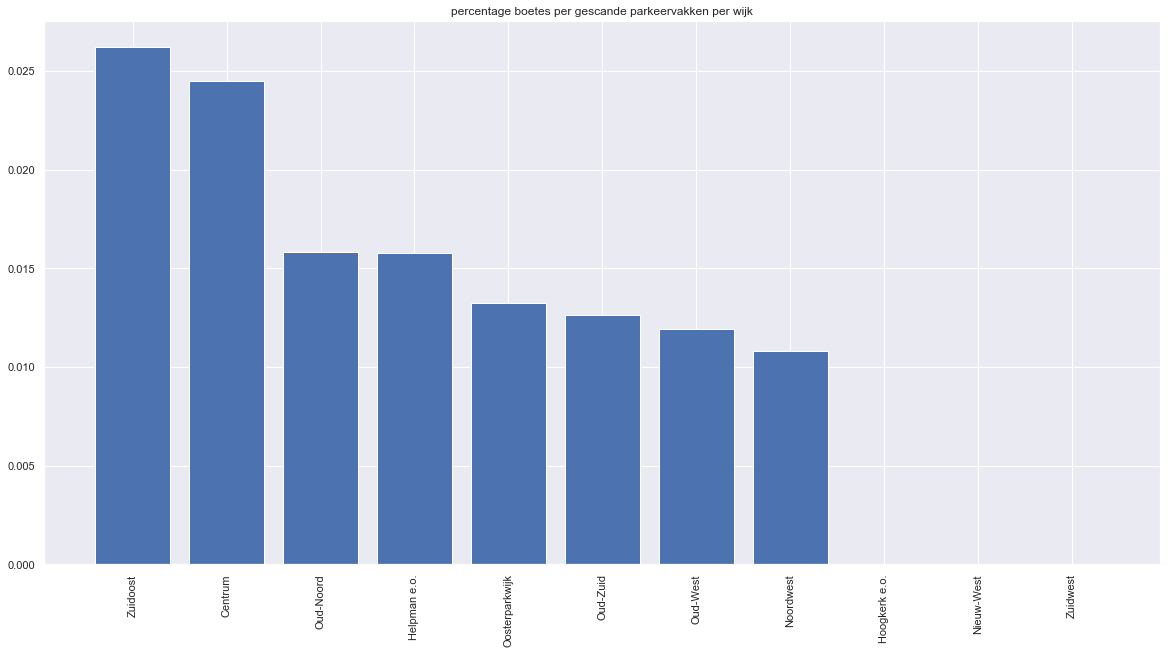

In [16]:
plt.figure(figsize=(20,10))
plt.bar(df_wijk['Wijk'], df_wijk['relative'])
plt.title('percentage boetes per gescande parkeervakken per wijk')
plt.xticks(rotation='vertical')
plt.show()

### Buurt analyse

In [17]:
df_buurt = grouping(df_scan, 'Buurt', 'Boete').sort_values(by=['relative'], ascending=False)
df_buurt.head()

,Buurt,count,sum,relative
22,Kop van Oost,5473,340,0.062123
25,Martini Trade Park,2129,101,0.047440
14,Florabuurt,1546,66,0.042691
4,Binnenstad-Zuid,125754,4247,0.033772
1,Binnenstad-Noord,47131,1589,0.033715


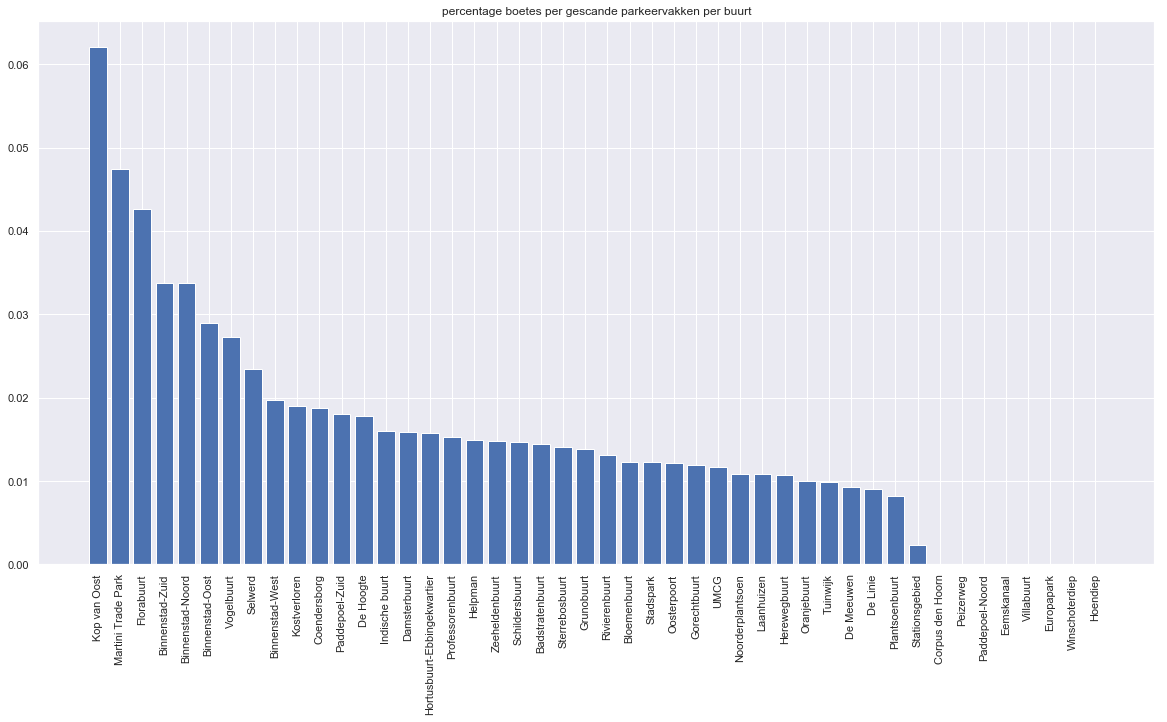

In [18]:
plt.figure(figsize=(20,10))
plt.bar(df_buurt['Buurt'], df_buurt['relative'])
plt.title('percentage boetes per gescande parkeervakken per buurt')
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# make an average coordinate out of each polygon (sum(longitude) / count(longitude))
polygons = [feature['geometry']['coordinates'] for feature in df_pv['features']]
longitude = []
latitude = []
for x in range(len(polygons)):
    t = np.array(polygons[x][0])
    longitude.append(t[:, 0].mean())
    latitude.append(t[:, 1].mean())

df_parkingspots['LONGITUDE'] = longitude
df_parkingspots['LATITUDE'] = latitude

In [20]:
stats.BasicStats(df_parkingspots)

,column,type,min,max,range,mean,stdev,populated,sum,unique,uniquelist,nulls,not applicable
0,AUTOMAATNR,int64,0.000000,4915.000000,4915.000000,3969.895920,1307.061263,17352,68885634.000000,306,,0,
1,FEATURE,string,,,,,,17352,,3,"{PARKKERVAK, Parkeervak, PARKEERVAK}",0,0
2,FUNCTIE,string,,,,,,17352,,40,too many,0,0
3,GROEP,string,,,,,,17352,,14,"{, K+R, PARTICULIER, AUTO DATE, LADEN EN LOSSE...",0,0
4,MAPID,int64,0.000000,567.000000,567.000000,258.241183,282.380661,17352,4481001.000000,2,,0,
5,METERID,string,,,,,,17352,,70,too many,0,0
6,MSLINK,int64,0.000000,26459.000000,26459.000000,4560.267231,6134.730459,17352,79129757.000000,7879,,0,
7,STROOKID,string,,,,,,17352,,1262,too many,0,0
8,VAKID,string,,,,,,17352,,7,"{, 11655, 11654, 11658, 11656, 11653, 11657}",0,0
9,X_COORD,float64,0.000000,235013.525000,235013.525000,108629.755387,116479.541067,17352,1884943515.470000,8039,,0,


In [21]:
df_parkingspots.head(5)

,AUTOMAATNR,FEATURE,FUNCTIE,GROEP,MAPID,METERID,MSLINK,STROOKID,VAKID,X_COORD,Y_COORD,LONGITUDE,LATITUDE
0,4531,PARKEERVAK,LADEN EN LOSSEN,LADEN EN LOSSEN,567,,21389,3625,,233136.226,581502.499,6.557059,53.214403
1,4531,PARKEERVAK,LADEN EN LOSSEN,LADEN EN LOSSEN,567,,21388,3624,,233197.150,581493.012,6.557857,53.214330
2,4515,PARKEERVAK,LADEN EN LOSSEN,LADEN EN LOSSEN,567,,17867,3054,,232900.237,581498.465,6.553373,53.214431
3,4317,PARKEERVAK,LADEN EN LOSSEN MA T/M ZA 9-18,LADEN EN LOSSEN,567,,17938,3075,,233442.333,582844.571,6.561828,53.226410
4,4058,PARKEERVAK,LADEN EN LOSSEN,LADEN EN LOSSEN,567,,3534,196,,233983.160,582115.797,6.569700,53.219823


In [22]:
for col in df_parkingspots.columns.tolist():
    if df_parkingspots[col].dtype == 'O':
        print(str(col) + ' ' + str(df_parkingspots[col].nunique()))

FEATURE 3
FUNCTIE 40
GROEP 14
METERID 70
STROOKID 1262
VAKID 7


In [23]:
df_parkingspots.groupby(by='GROEP')['GROEP'].count()

GROEP
                            978
AUTO DATE                    35
BETAALD                   15203
BUITEN ZONE                 134
ELEKTRO                      17
GERESERVEERD VOOR ARTS       13
INVALIDE ALGEMEEN           131
INVALIDE VERGUNNING         142
K+R                           1
LADEN EN LOSSEN             128
NIET PARKEREN                76
PARTICULIER                 134
TAXI                         33
VERGUNNING                  327
Name: GROEP, dtype: int64

In [24]:
df_parkingspots.groupby(by='FUNCTIE')['FUNCTIE'].count()

FUNCTIE
AUTO DATE                                    34
BETAALD                                   16011
BETAALD + LADEN EN LOSSEN                     2
BETAALD MA T/M ZA 18-22, NP 7-18             42
BETAALD MA T/M ZA 9-22 U                     27
BETAALD MA-VR 8-18 MAX 10 MIN                 3
BETAALD MA-VR 9-18 U                         61
BETAALD MA-ZA 18-22 U                         6
BETAALD MA-ZA 18-22 U NP MA-ZA 7-18 U         7
BUITEN ZONE                                 134
ELEKTRO                                      31
GERESERVEERD VOOR ARTS                       14
INVALIDE ALGEMEEN                           111
INVALIDE ALGEMEEN 18-24 U                     8
INVALIDE ALGEMEEN MA-VR 9-18                  5
INVALIDE ALGEMEEN MA-WO                       2
INVALIDE ALGEMEEN OP ZO                       4
INVALIDE ALGEMEEN ma-za 9-18                  1
INVALIDE VERGUNNING                         151
K+R                                           1
L EN L MA-ZA 9-18, BETAALD MA-ZA

In [25]:
# data handling
# handle FEATURE column
pvak = {'PARKEERVAK':'PARKEERVAK', 'Parkeervak':'PARKEERVAK', 'PARKKERVAK':'PARKEERVAK'}
df_parkingspots['FEATURE'] = df_parkingspots['FEATURE'].map(pvak)

### kaart van alle parkeervakken + wijk aanduiding

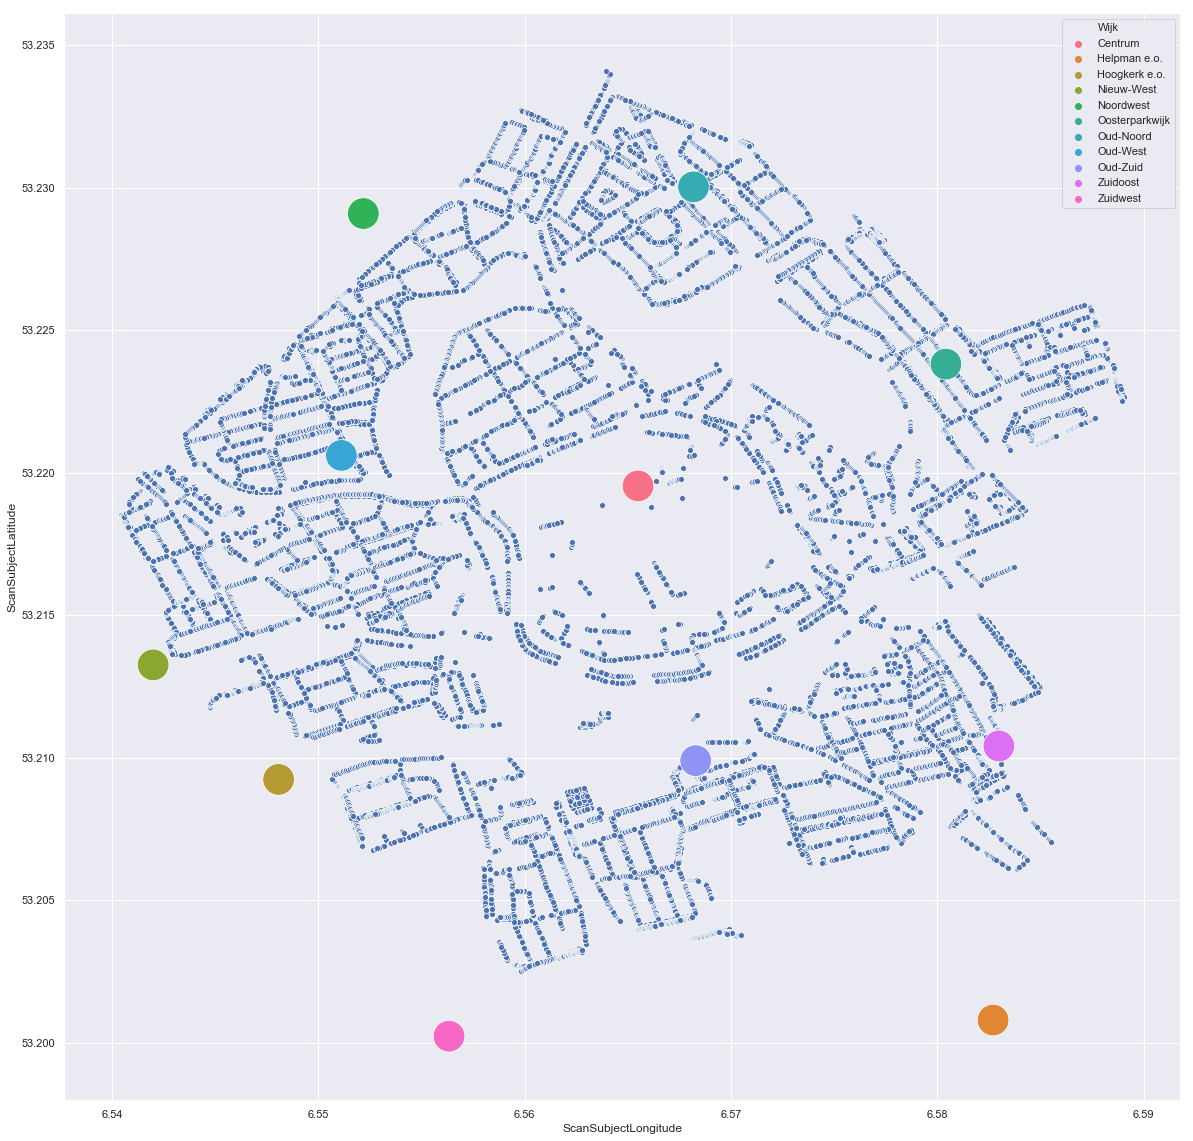

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
ax2= sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df_parkingspots[['LONGITUDE','LATITUDE']])
ax = sns.scatterplot(x="ScanSubjectLongitude", y="ScanSubjectLatitude", data=df_wijk_coords[['ScanSubjectLongitude','ScanSubjectLatitude']], s=1000, hue=df_wijk_coords['Wijk'])


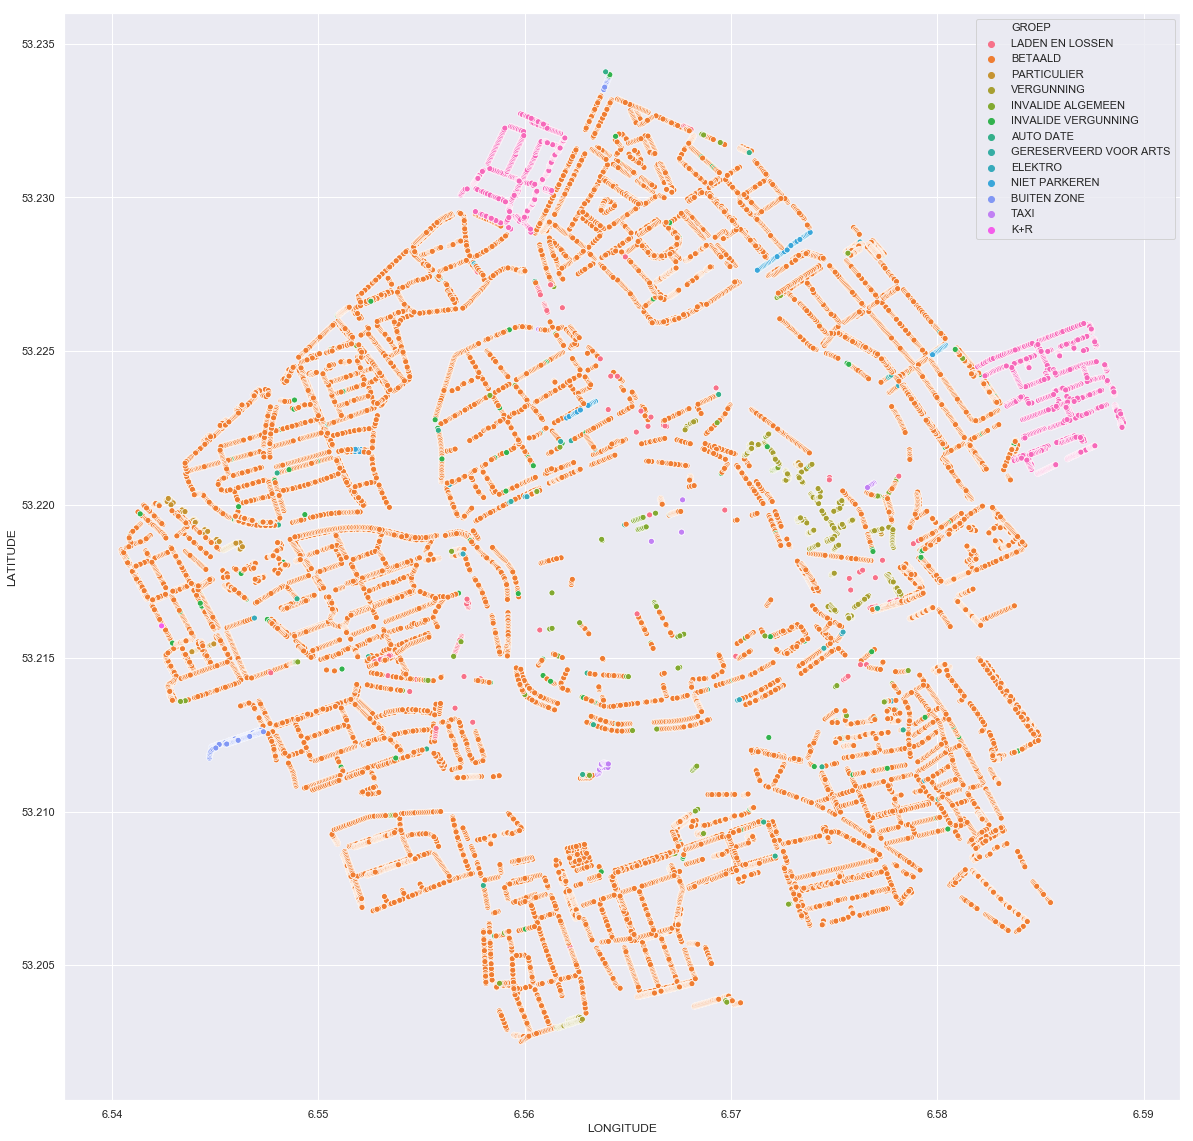

In [27]:
# make graph of all parking spots, highlight specific 'groep' item
groep = 'ELEKTRO'
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.scatterplot(x='LONGITUDE', 
                     y='LATITUDE', 
                     data=df_parkingspots[['LONGITUDE','LATITUDE']], 
                     hue=df_parkingspots['GROEP'])

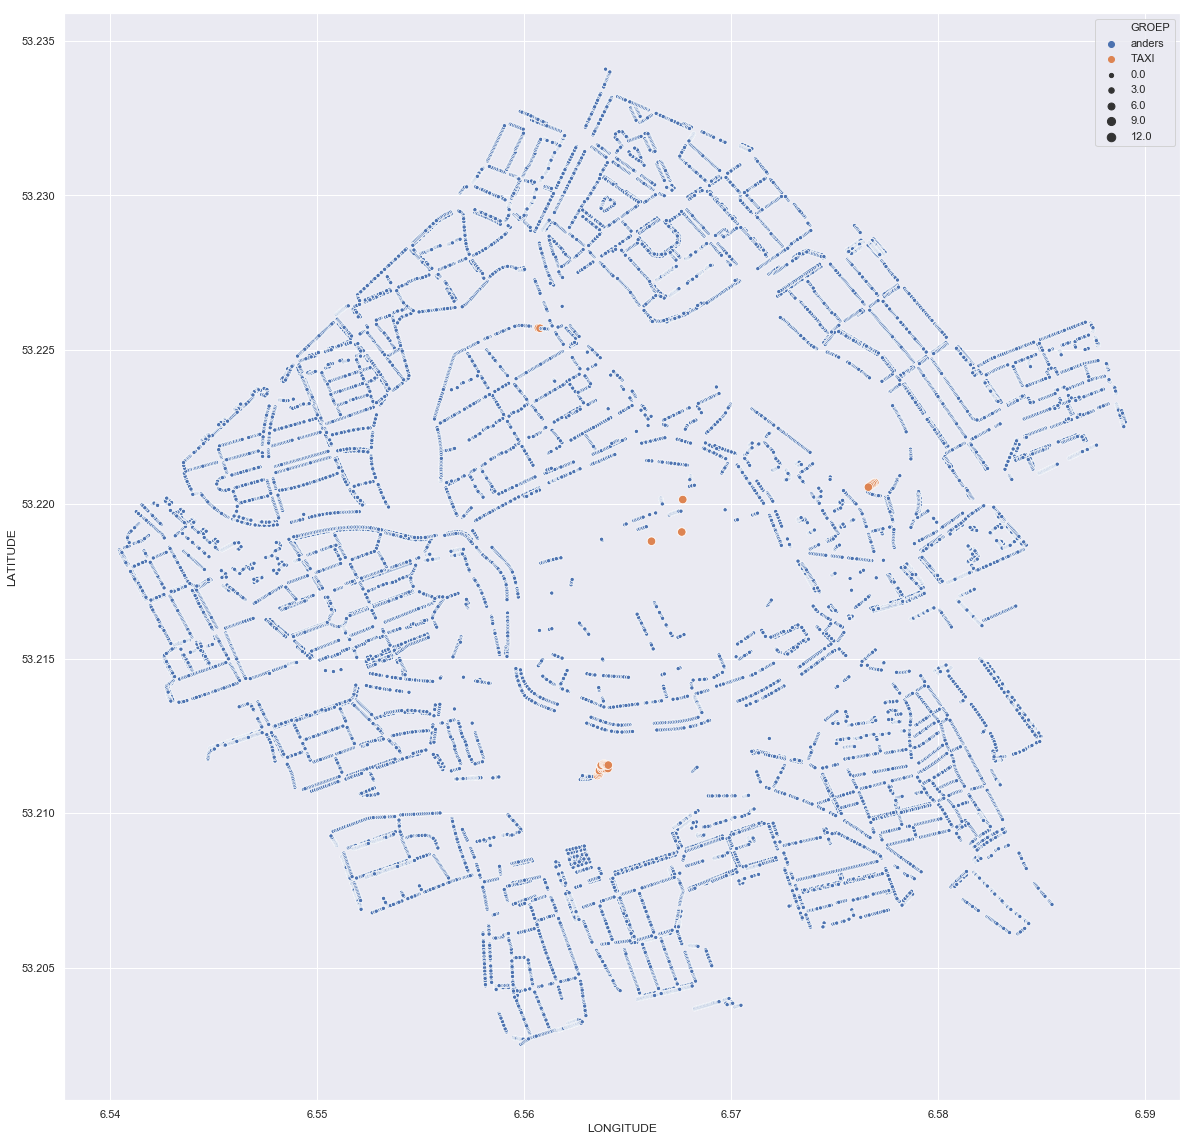

In [28]:
# make graph of all parking spots, highlight specific 'groep' item
groep = 'TAXI'
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.scatterplot(x='LONGITUDE', 
                     y='LATITUDE', 
                     data=df_parkingspots[['LONGITUDE','LATITUDE']], 
                     hue=df_parkingspots['GROEP'].map({groep: groep}).fillna('anders'),
                    size=df_parkingspots['GROEP'].map({groep: 10}).fillna(1))